<a href="https://colab.research.google.com/github/frankyuri/Sinosteel-AI-Challenge-Character_Recognition/blob/main/detectuon2_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

!wget https://c8.alamy.com/comp/D34ACK/traffic-congestion-in-sydney-city-centre-D34ACK.jpg
im1 = cv2.imread("./traffic-congestion-in-sydney-city-centre-D34ACK.jpg")
cv2_imshow(im1)
!wget https://st.hzcdn.com/simgs/7ed1a5630d4adfe5_8-1140/contemporary.jpg
im2 = cv2.imread("./contemporary.jpg")
cv2_imshow(im2)

In [22]:
model_path = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(model_path))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)
predictor = DefaultPredictor(cfg)
# print(predictor(im1))
outputs1 = predictor(im1)
# print(predictor(im2))
outputs2 = predictor(im2)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [21]:
v1 = Visualizer(im1[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out1 = v1.draw_instance_predictions(outputs1["instances"].to("cpu"))
# cv2_imshow(out1.get_image()[:, :, ::-1])

In [20]:
v2 = Visualizer(im2[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out2 = v2.draw_instance_predictions(outputs2["instances"].to("cpu"))
# cv2_imshow(out2.get_image()[:, :, ::-1])

In [19]:
model_path = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(model_path))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.15
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)
predictor = DefaultPredictor(cfg)
outputs1 = predictor(im1)
outputs2 = predictor(im2)

# We can use `Visualizer` to draw the predictions on the image.
v1 = Visualizer(im1[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out1 = v1.draw_instance_predictions(outputs1["instances"].to("cpu"))
# cv2_imshow(out1.get_image()[:, :, ::-1])

v2 = Visualizer(im2[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out2 = v2.draw_instance_predictions(outputs2["instances"].to("cpu"))
# cv2_imshow(out2.get_image()[:, :, ::-1])

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


--2021-09-23 15:47:34--  https://static.accupass.com/eventintro/2003280143201163114820.jpg
Resolving static.accupass.com (static.accupass.com)... 34.96.118.78
Connecting to static.accupass.com (static.accupass.com)|34.96.118.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘2003280143201163114820.jpg.10’

2003280143201163114     [ <=>                ] 290.76K  --.-KB/s    in 0.03s   

2021-09-23 15:47:34 (10.0 MB/s) - ‘2003280143201163114820.jpg.10’ saved [297734]

--2021-09-23 15:47:34--  https://media.discordapp.net/attachments/765174214856409089/890621502750326866/IMG_20210422_151748.jpg
Resolving media.discordapp.net (media.discordapp.net)... 162.159.128.232, 162.159.133.232, 162.159.130.232, ...
Connecting to media.discordapp.net (media.discordapp.net)|162.159.128.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 339423 (331K) [image/jpeg]
Saving to: ‘IMG_20210422_151748.jpg.1’

IMG_2021042

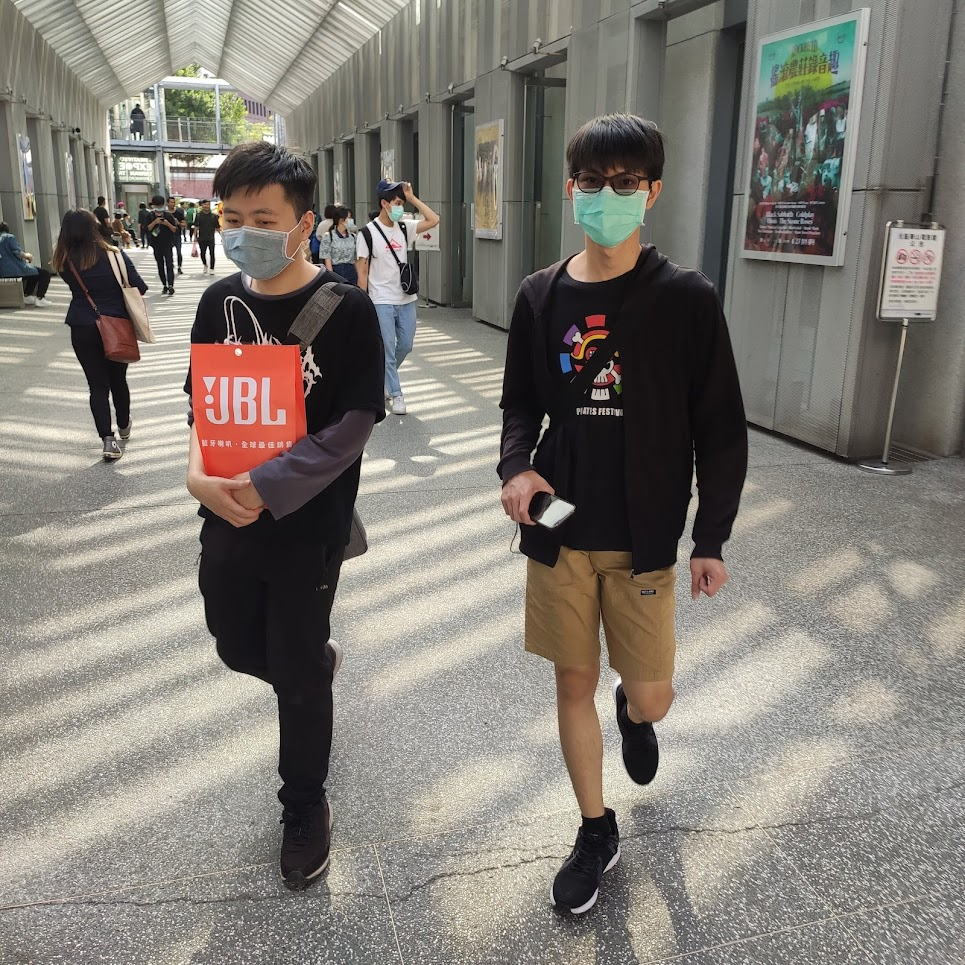

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


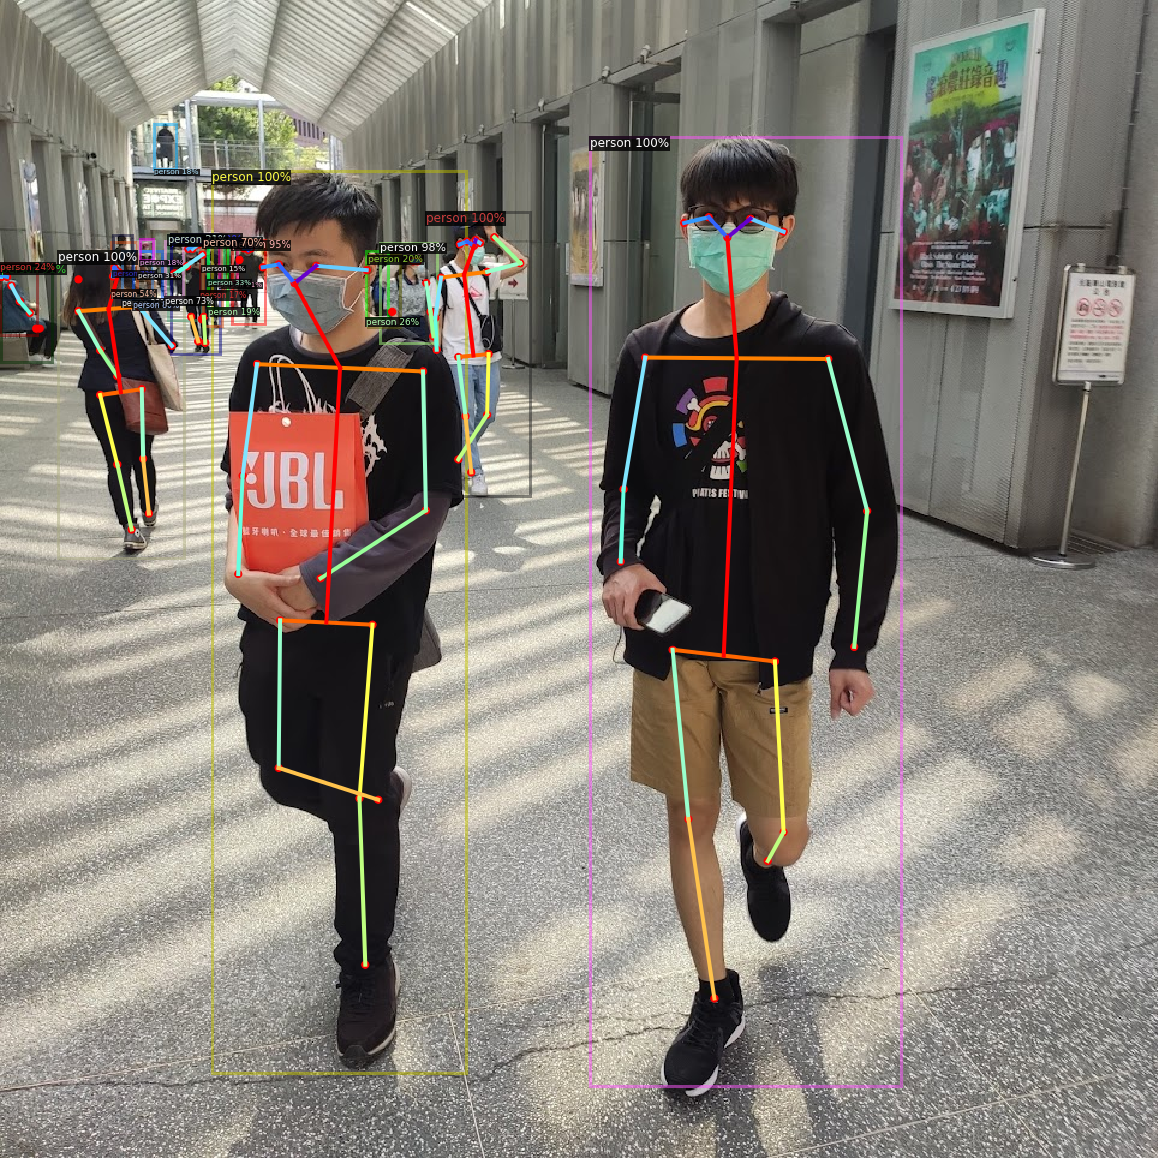

In [23]:
!wget https://static.accupass.com/eventintro/2003280143201163114820.jpg
im1 = cv2.imread("./2003280143201163114820.jpg")
# cv2_imshow(im1)
!wget https://media.discordapp.net/attachments/765174214856409089/890621502750326866/IMG_20210422_151748.jpg
im2 = cv2.imread("./IMG_20210422_151748.jpg")
cv2_imshow(im2)

model_path = "COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(model_path))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.15
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(model_path)
predictor = DefaultPredictor(cfg)
outputs1 = predictor(im1)
outputs2 = predictor(im2)

v1 = Visualizer(im1[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out1 = v1.draw_instance_predictions(outputs1["instances"].to("cpu"))
# cv2_imshow(out1.get_image()[:, :, ::-1])

v2 = Visualizer(im2[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out2 = v2.draw_instance_predictions(outputs2["instances"].to("cpu"))
cv2_imshow(out2.get_image()[:, :, ::-1])